In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

In [2]:
df = pd.read_csv('customer_churn_data.csv')

In [4]:
df.dtypes

CustomerID           int64
Age                  int64
Gender              object
Tenure               int64
MonthlyCharges     float64
ContractType        object
InternetService     object
TotalCharges       float64
TechSupport         object
Churn               object
dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder

gender_enc = LabelEncoder().fit(df['Gender'])
df['Gender_enc'] = gender_enc.transform(df['Gender'])

contract_enc = LabelEncoder().fit(df['ContractType'])
df['Contract_enc'] = contract_enc.transform(df['ContractType'])

tech_enc = LabelEncoder().fit(df['TechSupport'])
df['Tech_enc'] = tech_enc.transform(df['TechSupport'])

churn_enc = LabelEncoder().fit(df['Churn'])
df['Churn_enc'] = churn_enc.transform(df['Churn'])

In [5]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

**Handling missing values**

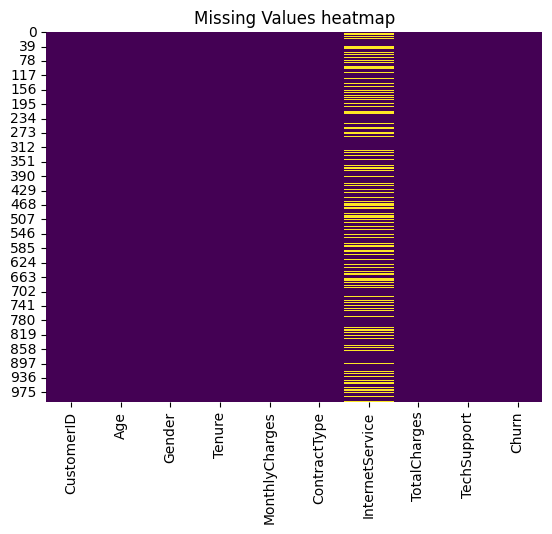

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values heatmap')
plt.show()

In [9]:
df['inter_missing'] = df['InternetService'].isnull().astype(int)

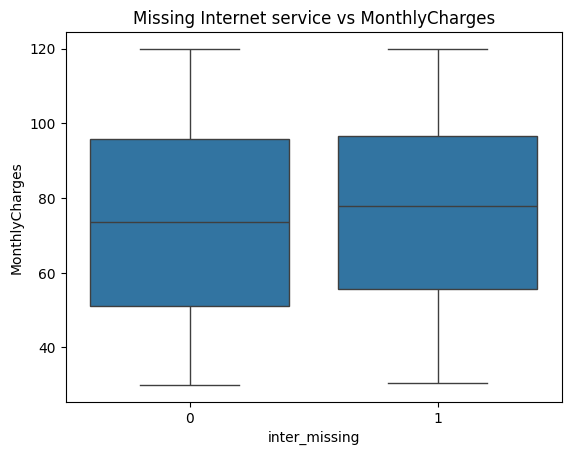

inter_missing         0         1
Churn                            
No             1.000000  0.000000
Yes            0.663647  0.336353


In [11]:
sns.boxplot(df, x='inter_missing', y='MonthlyCharges')
plt.title('Missing Internet service vs MonthlyCharges')
plt.show()

print(pd.crosstab(df['Churn'], df['inter_missing'], normalize='index'))

In [15]:
df.corr(numeric_only=True)

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges,inter_missing,Gender_enc,Contract_enc,Tech_enc,Churn_enc
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490,0.027811,0.000361,-0.016983,-0.028796,0.023867
Age,0.036730,1.000000,0.000472,0.006362,-0.001896,0.024766,-0.047394,0.015715,-0.097434,0.044115
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868,-0.006836,0.015453,-0.011176,-0.031601,-0.217675
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893,0.035278,0.027940,-0.068861,-0.017879,0.167773
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000,0.003900,0.028087,-0.034729,-0.048584,-0.101523
inter_missing,0.027811,0.024766,-0.006836,0.035278,0.003900,1.000000,0.012230,-0.046444,-0.657828,0.236599
Gender_enc,0.000361,-0.047394,0.015453,0.027940,0.028087,0.012230,1.000000,-0.044320,-0.027169,0.031539
Contract_enc,-0.016983,0.015715,-0.011176,-0.068861,-0.034729,-0.046444,-0.044320,1.000000,0.051974,-0.327041
Tech_enc,-0.028796,-0.097434,-0.031601,-0.017879,-0.048584,-0.657828,-0.027169,0.051974,1.000000,-0.359667
Churn_enc,0.023867,0.044115,-0.217675,0.167773,-0.101523,0.236599,0.031539,-0.327041,-0.359667,1.000000


In [17]:
df['TechSupport'].value_counts()

TechSupport
Yes    506
No     494
Name: count, dtype: int64

In [28]:
data = df[df['TechSupport'] == 'No'].groupby(['InternetService'])['InternetService'].count()
data

InternetService
DSL             93
Fiber Optic    104
Name: InternetService, dtype: int64

In [21]:
df[pd.isnull(df['InternetService'])].sample(10)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn,inter_missing,Gender_enc,Contract_enc,Tech_enc,Churn_enc
458,459,39,Female,49,54.45,Two-Year,NaN,2668.05,No,Yes,1,0,2,0,1
62,63,33,Male,15,103.96,One-Year,NaN,1559.40,No,Yes,1,1,1,0,1
555,556,40,Female,5,40.47,Month-to-Month,NaN,202.35,No,Yes,1,0,0,0,1
126,127,35,Male,28,98.61,One-Year,NaN,2761.08,No,Yes,1,1,1,0,1
819,820,55,Male,41,60.69,One-Year,NaN,2488.29,No,Yes,1,1,1,0,1
896,897,43,Female,61,75.00,One-Year,NaN,4575.00,No,Yes,1,0,1,0,1
193,194,32,Male,9,68.10,One-Year,NaN,612.90,No,Yes,1,1,1,0,1
741,742,32,Male,78,101.44,Two-Year,NaN,7912.32,No,Yes,1,1,2,0,1
391,392,49,Female,10,64.86,Month-to-Month,NaN,648.60,No,Yes,1,0,0,0,1
171,172,36,Male,0,90.10,Month-to-Month,NaN,0.00,No,Yes,1,1,0,0,1


In [29]:
df['InternetService'].value_counts()

InternetService
Fiber Optic    395
DSL            308
Name: count, dtype: int64

*Inference: missing values for InternetService is missing at random and only fairly related to TechSupport so we fill missing cells with 'Missing' or 'None'*

In [30]:
df['InternetService'].fillna('Missing', inplace=True)

In [31]:
df = df.drop(columns=['inter_missing'])

In [32]:
int_serv_enc = LabelEncoder().fit(df['InternetService'])
df['int_serv_enc'] = int_serv_enc.transform(df['InternetService'])

In [36]:
df.describe(include='all')

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn,Gender_enc,Contract_enc,Tech_enc,Churn_enc,int_serv_enc
count,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
unique,NaN,NaN,2,NaN,NaN,3,3,NaN,2,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Female,NaN,NaN,Month-to-Month,Fiber Optic,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,538,NaN,NaN,511,395,NaN,506,883,NaN,NaN,NaN,NaN,NaN
mean,500.500000,44.674000,NaN,18.97300,74.391290,NaN,NaN,1404.364060,NaN,NaN,0.462000,0.689000,0.506000,0.883000,0.989000
std,288.819436,9.797741,NaN,18.89257,25.712083,NaN,NaN,1571.755048,NaN,NaN,0.498803,0.784152,0.500214,0.321581,0.778129
min,1.000000,12.000000,NaN,0.00000,30.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,38.000000,NaN,5.00000,52.357500,NaN,NaN,345.217500,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000
50%,500.500000,45.000000,NaN,13.00000,74.060000,NaN,NaN,872.870000,NaN,NaN,0.000000,0.000000,1.000000,1.000000,1.000000
75%,750.250000,51.000000,NaN,26.00000,96.102500,NaN,NaN,1900.175000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,2.000000


In [37]:
# create age groups
bins = [0, 20, 30, 40, 50, 60, 70, 100]

labels = ['young', 'young-adult', 'adult', 'mid-age', 'senior', 'older-senior', 'elderly']

df['Age_group'] = pd.cut(df['Age'], bins = bins, labels = labels, right=False)

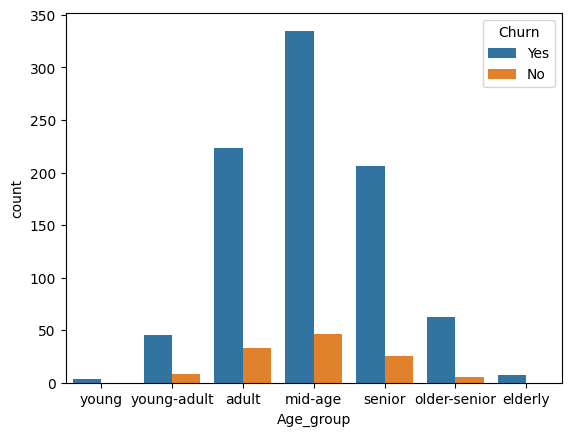

In [38]:
sns.countplot(df, x = 'Age_group', hue='Churn')
plt.show()

**Gender EDA**

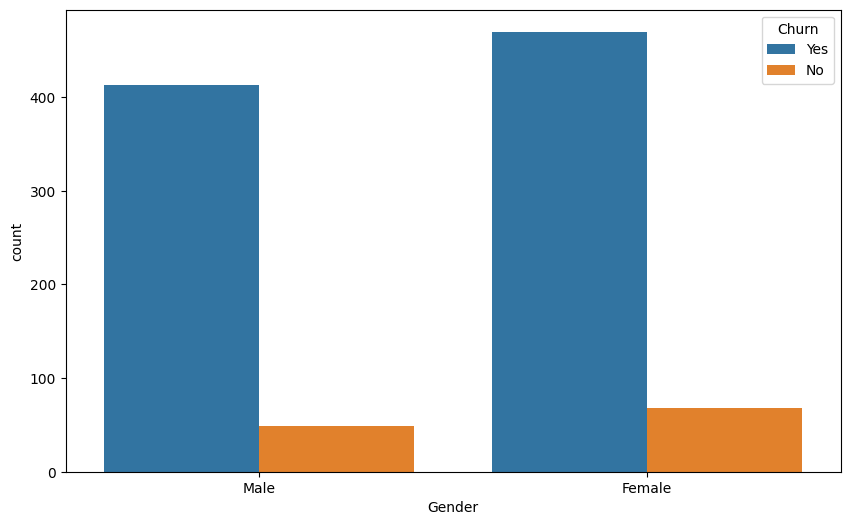

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(df, x = 'Gender', hue = 'Churn')
plt.show()

Customer churn is not influenced by gender

**Tenure Analysis**

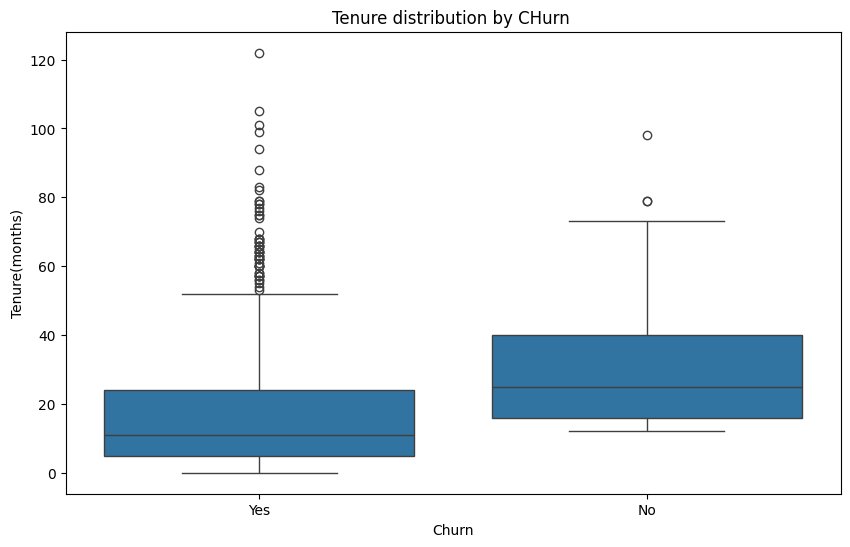

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(df, x='Churn', y='Tenure')
plt.title('Tenure distribution by CHurn ')
plt.ylabel('Tenure(months)')
plt.show()

This suggests that newer customers have a higher probability to leave compared to custormers with higher tenures

*Retention Strategies: Consider targeting customers with lower tenures for retention efforts, as they are at higher risk of churn based on these insights.*

In [54]:
bins = [0, 12, 24, 48, max(df['Tenure'])]
labels = ['<1yr', '>1yr', '2-4yr', '>4yr']

df['Tenure_cat'] = pd.cut(df['Tenure'], bins = bins, labels= labels, include_lowest=True)

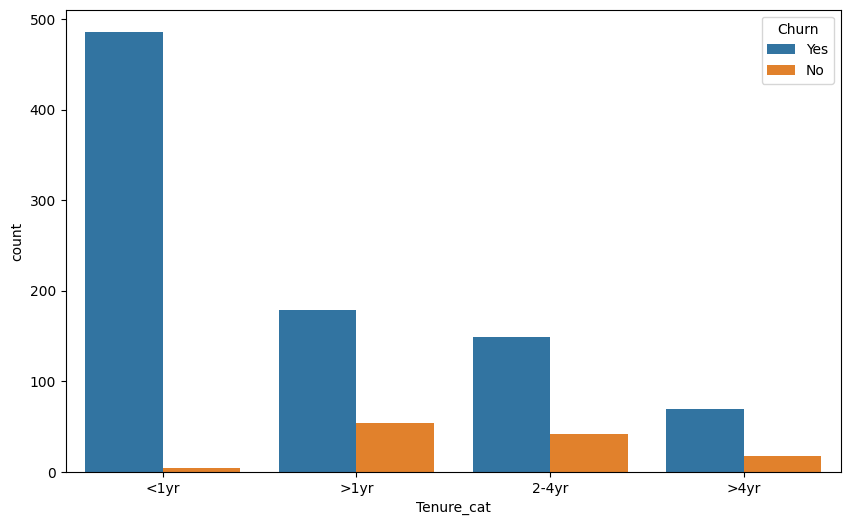

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(df, x = 'Tenure_cat', hue = 'Churn')
plt.show()

**Monthly Charges EDA**

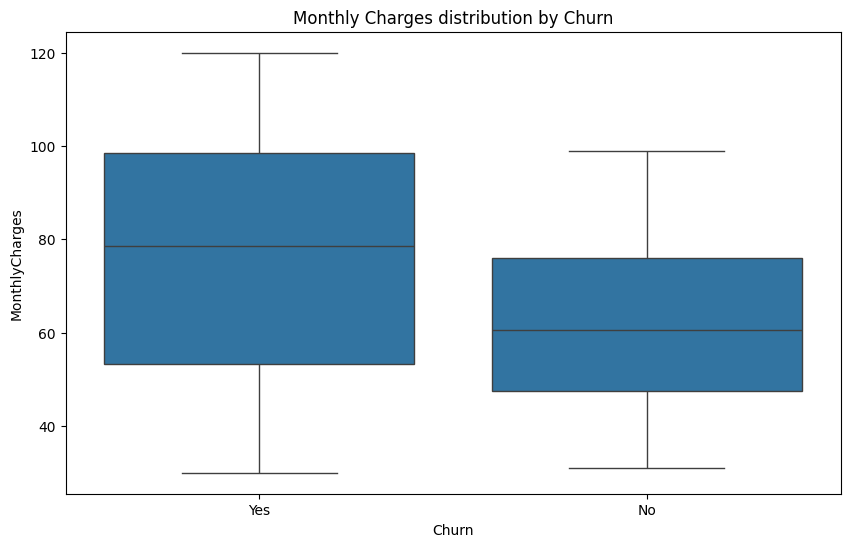

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges distribution by Churn')
plt.show()

In [53]:
bins = [0, 50, 80, 120]
labels = ['low', 'medium', 'high']

df['CustPaymentCat'] = pd.cut(df['MonthlyCharges'], bins = bins, labels = labels, right=True)

This suggests that higher monthly charges are associated with an increased likelihood of churn.

**Contract type EDA**

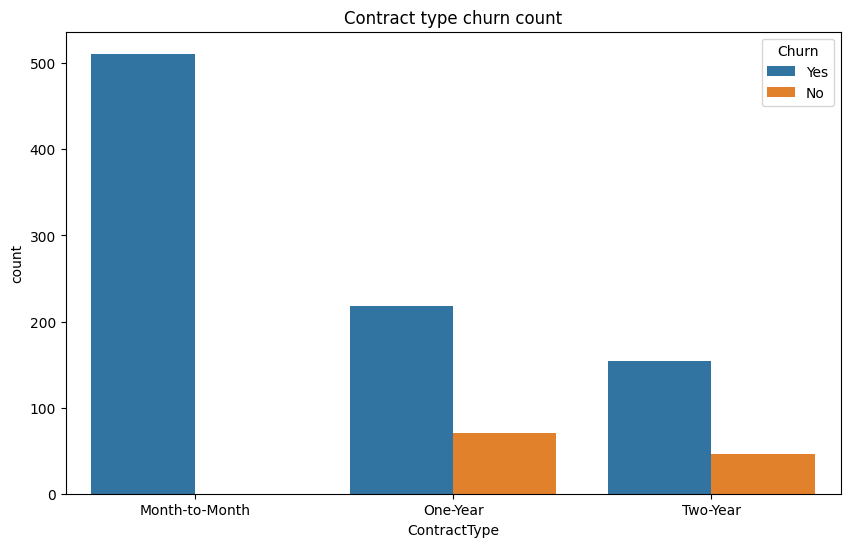

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(df, x='ContractType', hue='Churn')
plt.title('Contract type churn count')
plt.show()

This suggests that montly subscribers are more prone to leave compared to yearly and two-year contract customers

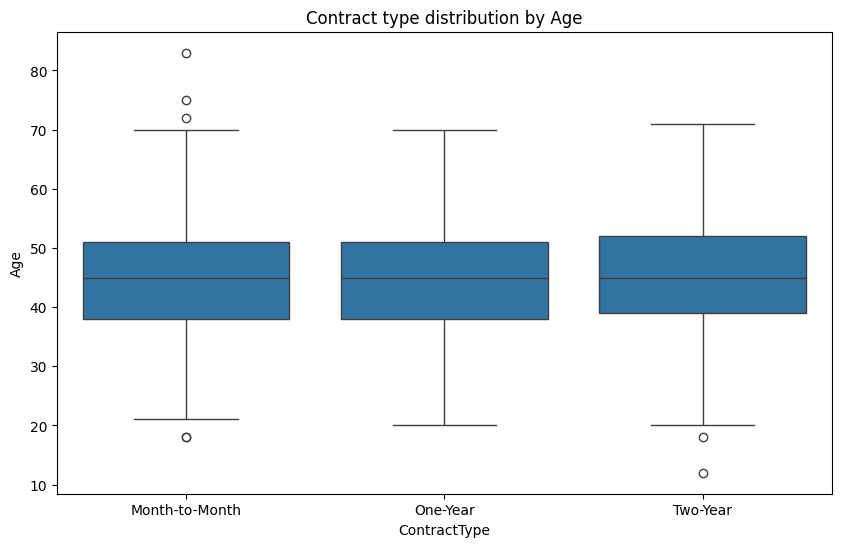

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(df, x = 'ContractType', y='Age')
plt.title('Contract type distribution by Age')
plt.show()

This suggests that the choice of contract type is not influeced by age of customers

**Internet service EDA**

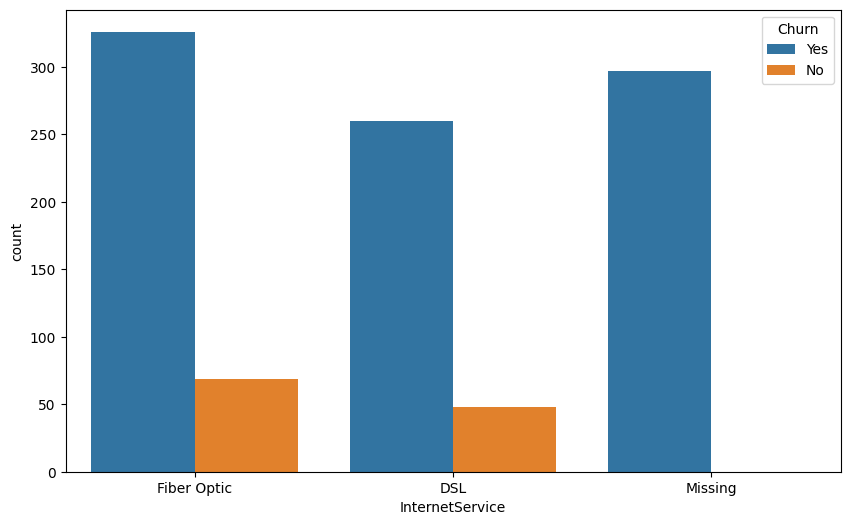

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(df, x = 'InternetService', hue='Churn')
plt.show()

This indicates that internet service type barely influences cutomer churn

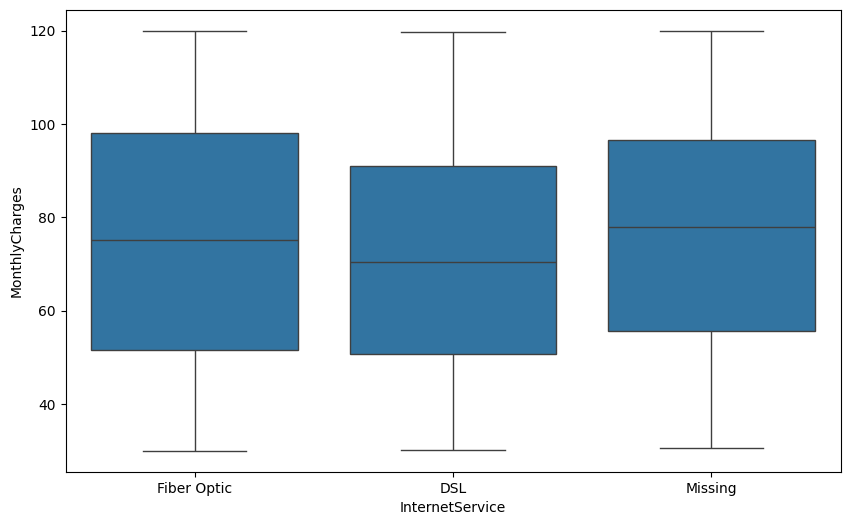

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(df, x='InternetService', y='MonthlyCharges')
plt.show()

**Tech Support EDA**

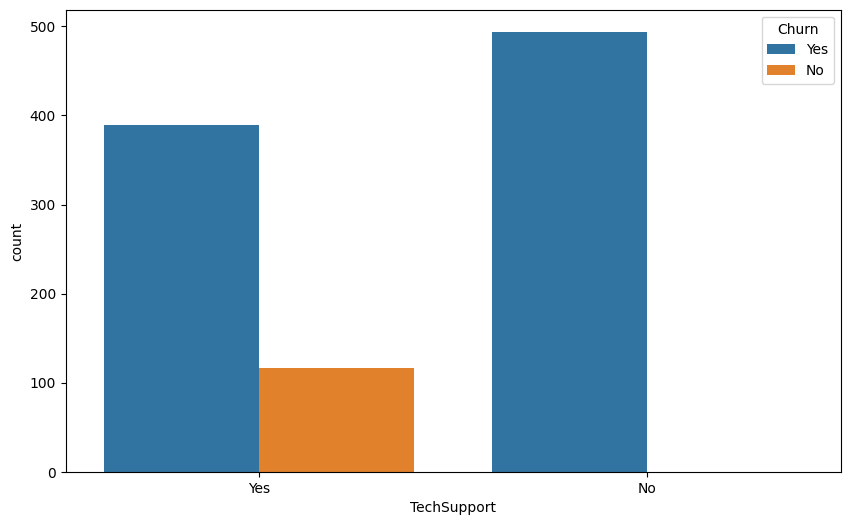

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(df, x='TechSupport', hue='Churn')
plt.show()

In [58]:
tenure_cat_enc = LabelEncoder().fit(df['Tenure_cat'])
df['Tenure_cat_enc'] = tenure_cat_enc.transform(df['Tenure_cat'])

monthly_cus_enc = LabelEncoder().fit(df['CustPaymentCat'])
df['CustPaymentCat_enc'] = monthly_cus_enc.transform(df['CustPaymentCat'])

age_group_enc = LabelEncoder().fit(df['Age_group'])
df['Age_group_enc'] = age_group_enc.transform(df['Age_group'])

In [59]:
df.sample(10)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn,Gender_enc,Contract_enc,Tech_enc,Churn_enc,int_serv_enc,Age_group,CustPaymentCat,Tenure_cat,Tenure_cat_enc,CustPaymentCat_enc,Age_group_enc
361,362,60,Male,37,75.95,One-Year,Missing,2810.15,No,Yes,1,1,0,1,2,older-senior,medium,2-4yr,0,2,3
713,714,48,Female,1,35.10,Month-to-Month,DSL,35.10,Yes,Yes,0,0,1,1,0,mid-age,low,<1yr,1,1,2
266,267,61,Female,1,35.13,Two-Year,DSL,35.13,Yes,Yes,0,2,1,1,0,older-senior,low,<1yr,1,1,3
399,400,57,Male,14,32.71,Two-Year,Fiber Optic,457.94,No,Yes,1,2,0,1,1,senior,low,>1yr,2,1,4
272,273,56,Female,32,99.93,Month-to-Month,Missing,3197.76,No,Yes,0,0,0,1,2,senior,high,2-4yr,0,0,4
416,417,60,Female,8,93.56,Month-to-Month,Fiber Optic,748.48,No,Yes,0,0,0,1,1,older-senior,high,<1yr,1,0,3
926,927,39,Male,1,110.81,Month-to-Month,DSL,110.81,Yes,Yes,1,0,1,1,0,adult,high,<1yr,1,0,0
131,132,45,Female,62,86.22,Month-to-Month,DSL,5345.64,No,Yes,0,0,0,1,0,mid-age,high,>4yr,3,0,2
118,119,56,Female,14,100.54,Month-to-Month,DSL,1407.56,Yes,Yes,0,0,1,1,0,senior,high,>1yr,2,0,4
75,76,53,Male,37,83.58,Month-to-Month,Fiber Optic,3092.46,Yes,Yes,1,0,1,1,1,senior,high,2-4yr,0,0,4


In [60]:
df.to_csv('prepped_data.csv')